# Data Visualization for University Admissions Dataset

## Description of the Dataset and Purpose of Visualization

This dataset contains information about graduate school admissions, including GRE score, TOEFL score, university rating, statement of purpose (SOP) score, letter of recommendation (LOR) score, undergraduate CGPA, research experience, and chance of admit. There are 400 entries in the dataset.

The purpose of this data visualization is to explore relationships between the different variables and understand patterns that may influence the chance of admission. By visualizing the data in various ways, we can gain insights into which factors are most predictive of admission, identify any outliers or unusual cases, and potentially build a model to predict chance of admit based on the other attributes.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
data = pd.read_csv("adm_data.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [15]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

## 1. Pairplot
In order to look at relationships between all the numeric variables simultaneously.

**Specifics of the Visualization**
- The pairplot creates a grid of scatterplots, with each variable plotted against each other variable
- The diagonal shows univariate distributions of each variable
Plots are colored by the binary 'Research' variable to see if there are any differences between the two groups

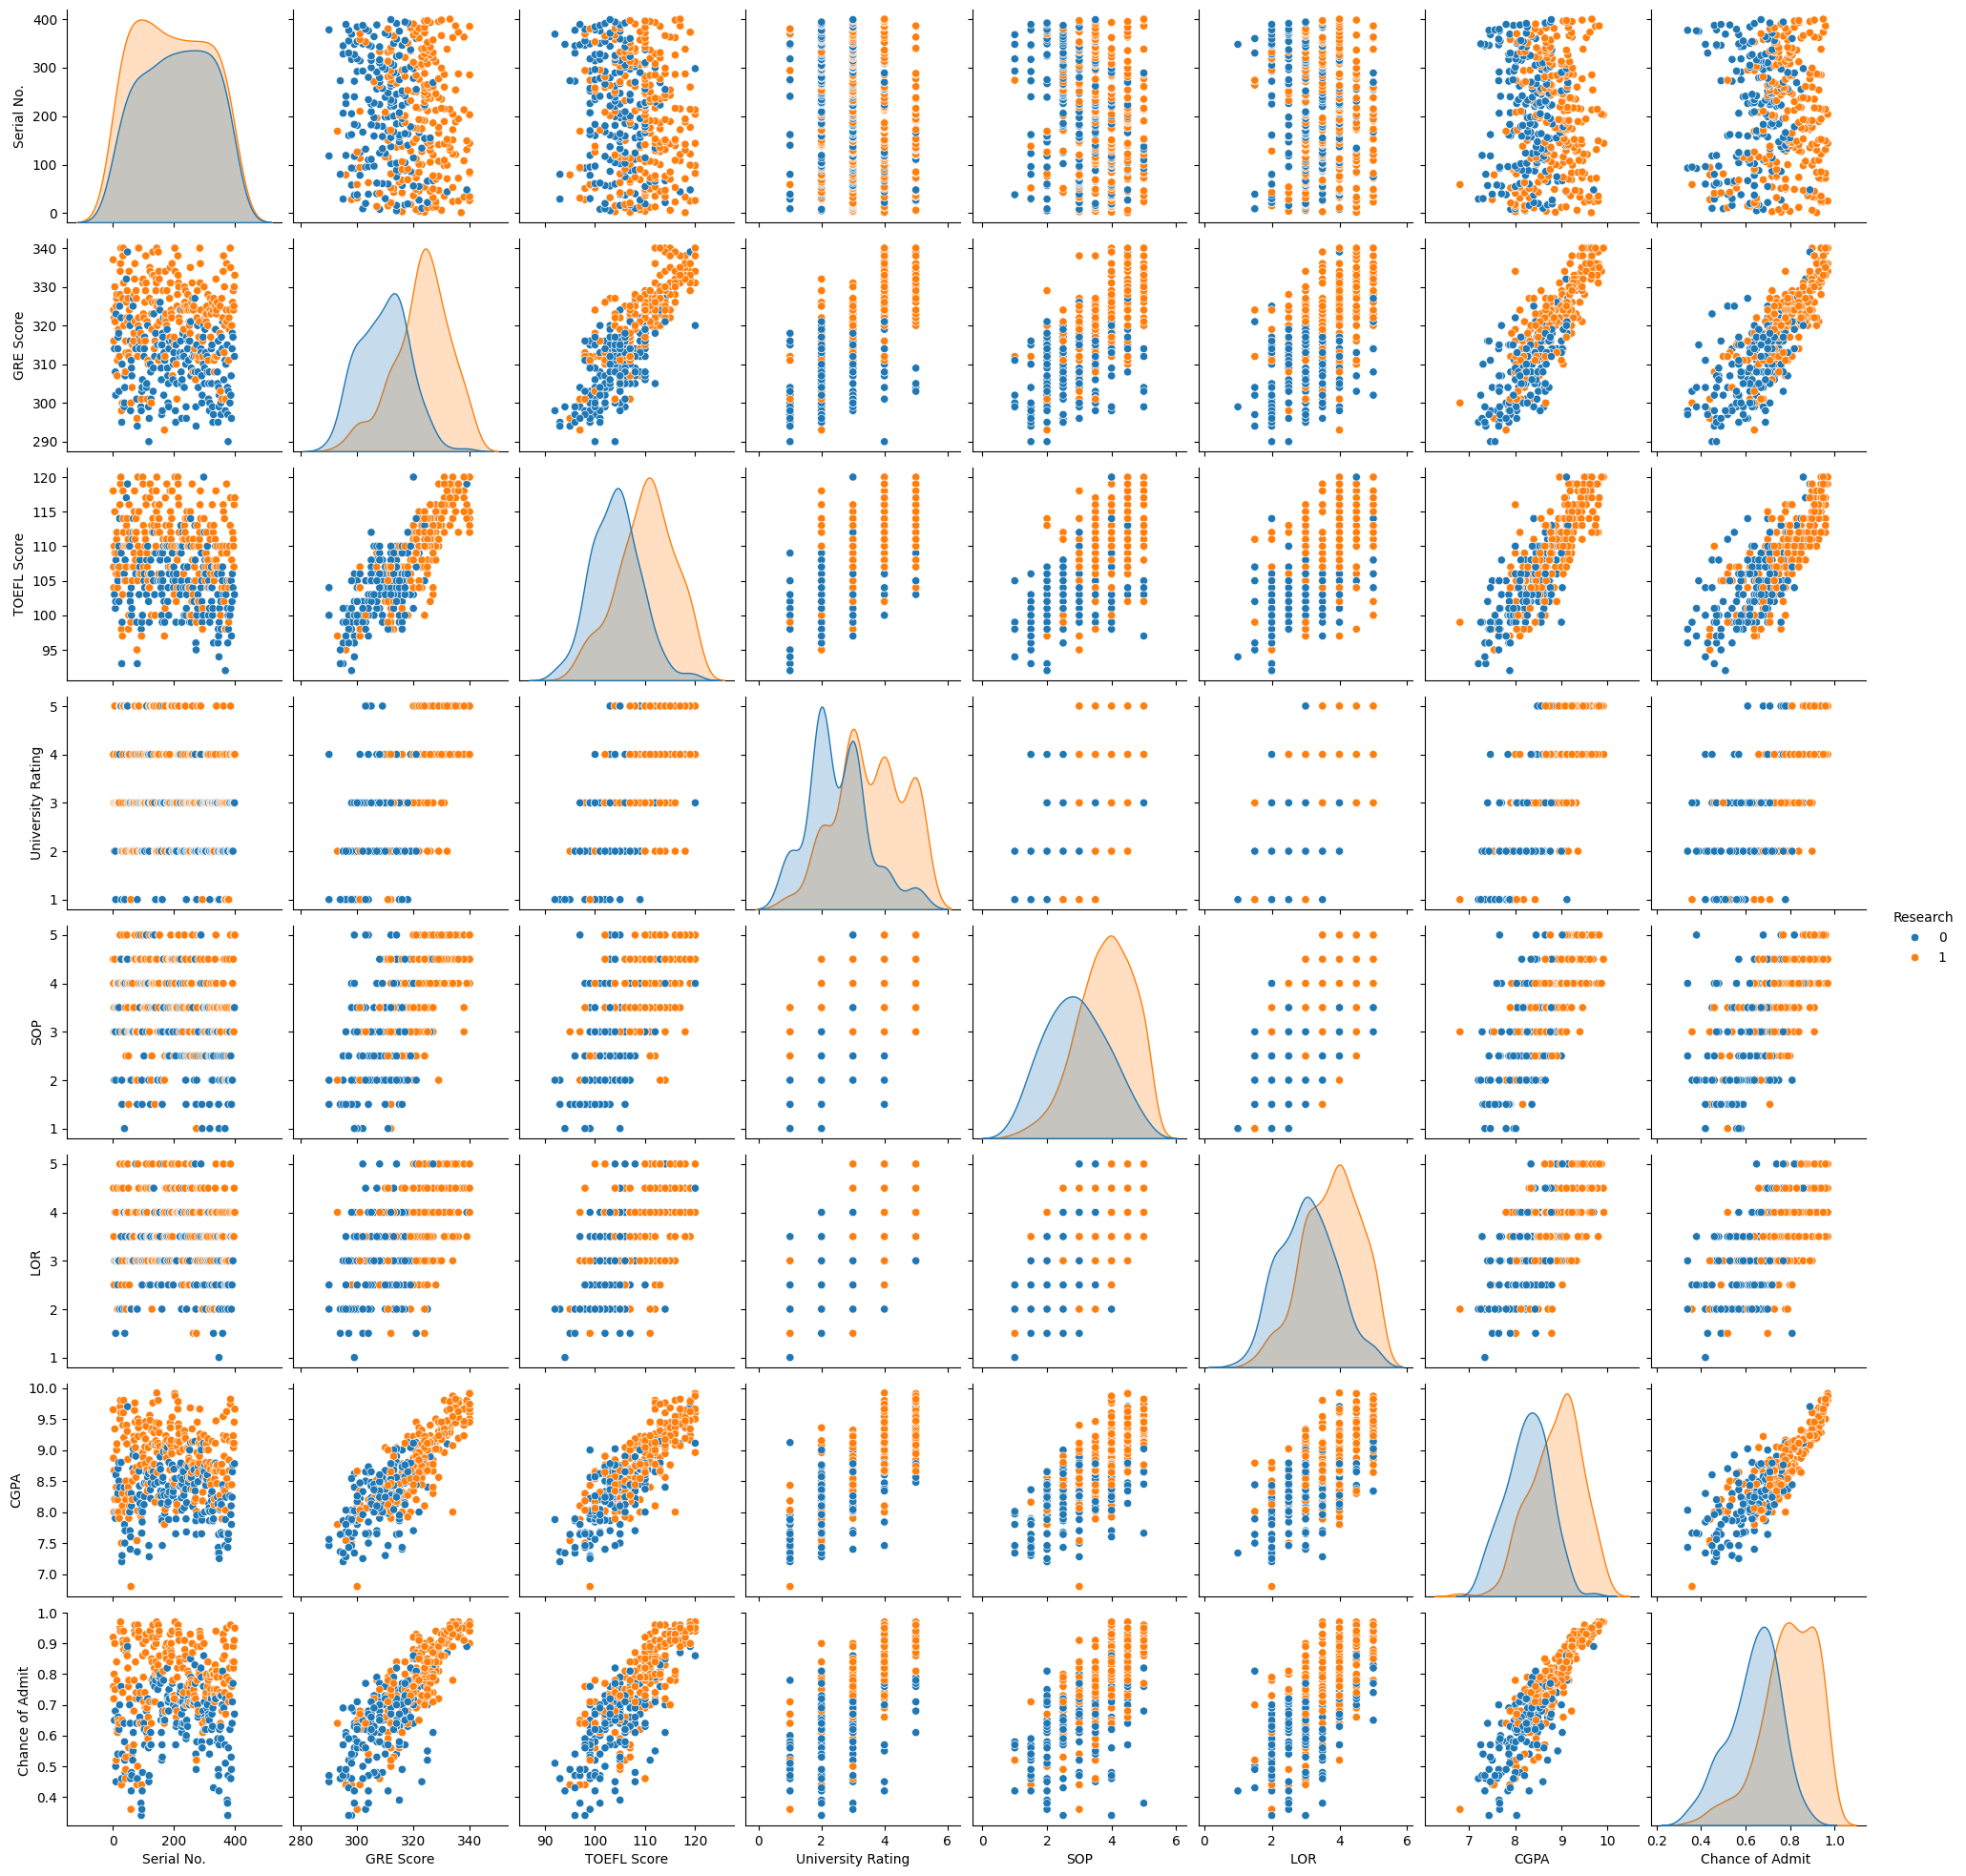

In [13]:
sns.pairplot(data, hue='Research')
plt.show()

## 2. Heatmap of Correlations

**Specifics of the Visualization**
- The heatmap shows the pairwise correlations between all variables
Correlation coefficients are annotated in each cell
- The 'coolwarm' colormap is used to clearly distinguish positive and negative correlations
- We can see that the most strongly correlated variables with Chance of Admit are CGPA, GRE Score, and TOEFL Score

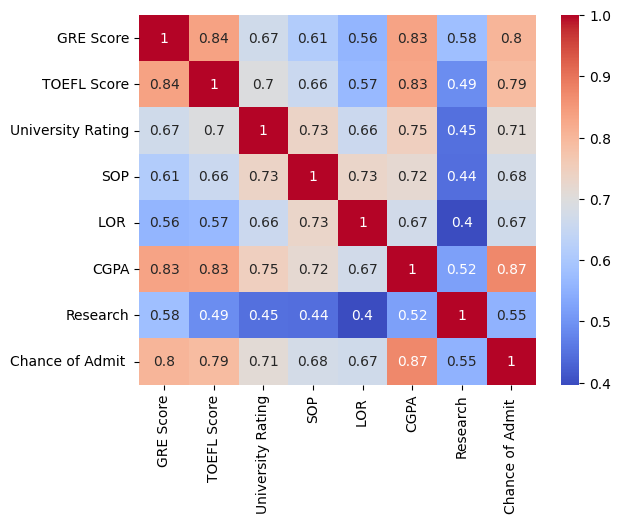

In [18]:
corr = data.drop(columns=['Serial No.']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## 3. Boxplots of Key Variables by Admit Chance

**Specifics of the Visualization**
- 4 boxplots are created in a 2x2 grid, showing distributions of GRE Score, TOEFL Score, CGPA, and University Rating
- Distributions are split out by rounded Chance of Admit to see how they vary
- Boxes show IQR with median line, whiskers extend to 1.5*IQR
Outliers are shown as individual points
- We can see the distributions shifting upwards as chance of admit increases, especially for GRE, TOEFL and CGPA

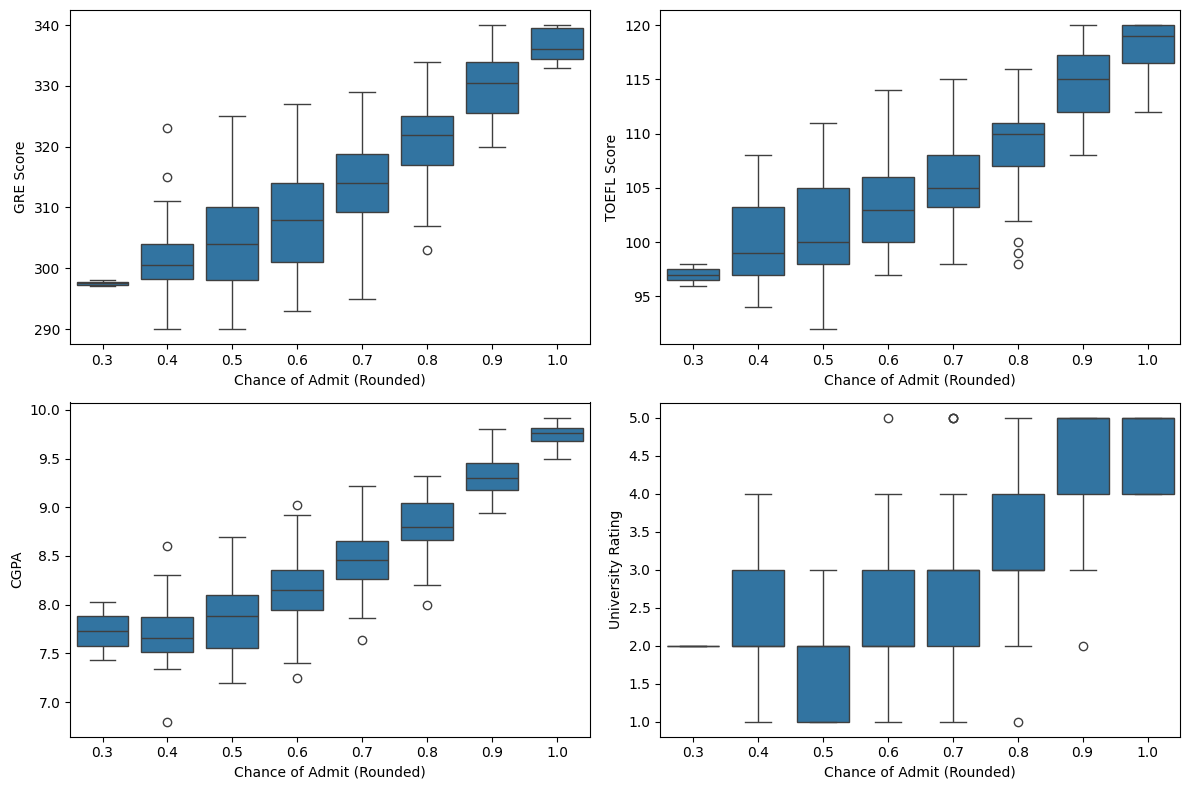

In [20]:
data['Chance of Admit (Rounded)'] = data['Chance of Admit '].round(1)

fig, axes = plt.subplots(2, 2, figsize=(12,8))
sns.boxplot(ax=axes[0,0], x='Chance of Admit (Rounded)', y='GRE Score', data=data) 
sns.boxplot(ax=axes[0,1], x='Chance of Admit (Rounded)', y='TOEFL Score', data=data)
sns.boxplot(ax=axes[1,0], x='Chance of Admit (Rounded)', y='CGPA', data=data)
sns.boxplot(ax=axes[1,1], x='Chance of Admit (Rounded)', y='University Rating', data=data)

plt.tight_layout()
plt.show()

## 4. Stacked Bar Plots of SOP and LOR Scores
Visualize the distributions of Statement of Purpose (SOP) and Letter of Recommendation (LOR) scores together.

- Bars show counts of SOP and LOR scores stacked on top of each other
SOP bars are on the bottom, LOR bars are on top
- This allows easy comparison of relative frequencies between the two scores
- Legend clarifies which bars represent which score
- Most common scores appear to be 3.5 and 4.0 for both SOP and LOR
- Very few applicants have scores of 1.0, 1.5

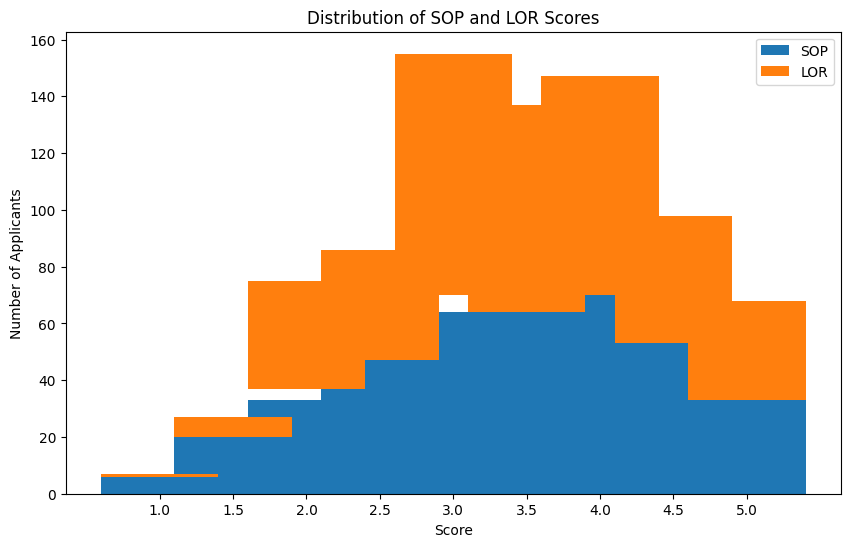

In [22]:
sop_counts = data['SOP'].value_counts()
lor_counts = data['LOR '].value_counts()

fig, ax = plt.subplots(figsize=(10,6))
sop_bar = ax.bar(sop_counts.index, sop_counts.values)
lor_bar = ax.bar(lor_counts.index, lor_counts.values, bottom=sop_counts.values)

ax.set_xticks(sop_counts.index)
ax.set_xlabel('Score')
ax.set_ylabel('Number of Applicants')
ax.set_title('Distribution of SOP and LOR Scores')
ax.legend((sop_bar[0], lor_bar[0]), ('SOP', 'LOR'))

plt.show()

## 5. 3D Scatter Plot of GRE, TOEFL and CGPA
an interactive 3D scatter plot of GRE Score, TOEFL Score and CGPA

**Specifics of the Visualization**
- Each point represents an individual applicant
- Points are positioned in 3D space according to their GRE Score, TOEFL Score and CGPA
- Color and size of points represent the chance of admit, with larger, brighter points having a higher chance
- Plot is interactive, allowing rotation and zooming to explore the 3D space
- We can see a clear trend of applicants with higher scores on all 3 metrics having a higher chance of admit

In [32]:
import plotly.express as px

fig = px.scatter_3d(data, x='GRE Score', y='TOEFL Score', z='CGPA',
                    color='Chance of Admit ', size='Chance of Admit ', 
                    color_continuous_scale='viridis', title='3D Scatter Plot of GRE, TOEFL and CGPA')
fig.show()